Previsão do tempo Cabo Frio

Código para coletar os dados da API:

In [ ]:
import requests
import json

# Sua chave de API do OpenWeatherMap
api_key = ""
city = "Cabo Frio,br"  # Exemplo de cidade, altere conforme sua preferência
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric&lang=pt_br"

# Realiza a requisição à API
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    # Exibindo informações relevantes sobre o clima
    print("Informações do Clima:")
    print(f"Temperatura: {data['main']['temp']}°C")
    print(f"Descrição: {data['weather'][0]['description']}")
    print(f"Umidade: {data['main']['humidity']}%")
    print(f"Pressão atmosférica: {data['main']['pressure']} hPa")
    print(f"Vento: {data['wind']['speed']} m/s")
else:
    print(f"Erro ao acessar os dados. Código de status: {response.status_code}")


Informações do Clima:
Temperatura: 21.14°C
Descrição: nublado
Umidade: 79%
Pressão atmosférica: 1024 hPa
Vento: 3.79 m/s


Transformar os dados da API em um DataFrame:

In [ ]:
import requests
import pandas as pd
import json
from datetime import datetime

# Sua chave de API do OpenWeatherMap
api_key = ""
city = "Cabo Frio,br"  # Altere para sua cidade
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric&lang=pt_br"

# Faz a requisição à API
response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Coleta das informações relevantes da resposta
    clima = {
        "Data": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Temperatura": data['main']['temp'],
        "Umidade": data['main']['humidity'],
        "Pressao": data['main']['pressure'],
        "Vento": data['wind']['speed'],
        "Descricao": data['weather'][0]['description']
    }

    # Transformando o dicionário em DataFrame
    df = pd.DataFrame([clima])

    # Exibindo os dados
    print(df)

    # Dividindo os dados em variáveis independentes (X) e dependentes (y)
    X = df[['Umidade', 'Pressao', 'Vento']]  # Variáveis independentes
    y = df['Temperatura']  # Variável dependente (o que queremos prever)

    # Para salvar em um arquivo CSV (opcional)
    df.to_csv("historico_clima.csv", mode='a', header=False, index=False)

else:
    print(f"Erro ao acessar os dados. Código de status: {response.status_code}")


                  Data  Temperatura  Umidade  Pressao  Vento Descricao
0  2025-05-14 23:00:28        21.14       79     1024   3.79   nublado


 Treinamento do Modelo de Machine Learning:
Vamos usar um modelo de regressão linear, que é simples e eficaz para esse tipo de tarefa.

 Código para treinamento do modelo:

                        Data  Temperatura    Umidade      Pressao      Vento  \
0 2025-05-14 23:06:27.952110    25.618102  80.377243  1009.716932   1.793914   
1 2025-05-13 23:06:27.952110    34.260715  58.526206  1006.783726  10.698672   
2 2025-05-12 23:06:27.952110    30.979909  53.252580  1020.718438  11.411776   
3 2025-05-11 23:06:27.952110    28.979877  97.444277  1008.918833   8.419158   
4 2025-05-10 23:06:27.952110    22.340280  98.281602  1007.023363  11.564508   

  Descricao  
0   Nublado  
1   Nublado  
2   Nublado  
3   Nublado  
4   Nublado  


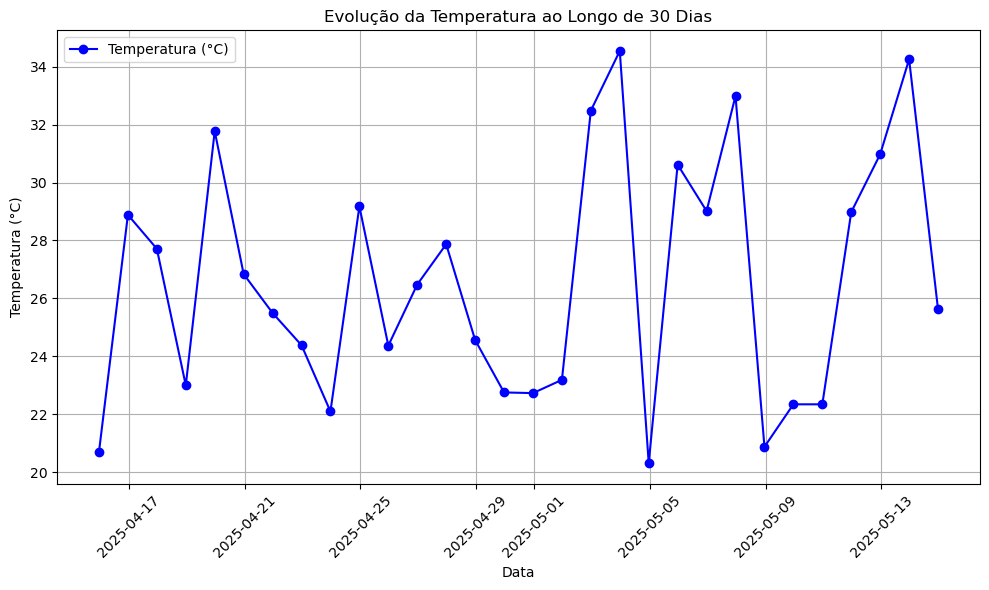

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Gerar dados simulados
np.random.seed(42)

# Definir o número de dias
num_days = 30  # Por exemplo, 30 dias de dados simulados

# Criar uma lista de datas
dates = [datetime.now() - timedelta(days=i) for i in range(num_days)]

# Simular dados de temperatura, umidade, pressão e vento
temperaturas = np.random.uniform(20, 35, num_days)  # Temperaturas entre 20 e 35 graus Celsius
umidades = np.random.uniform(50, 100, num_days)  # Umidade entre 50% e 100%
pressao = np.random.uniform(1000, 1025, num_days)  # Pressão entre 1000 e 1025 hPa
vento = np.random.uniform(0, 15, num_days)  # Velocidade do vento entre 0 e 15 m/s

# Criando o DataFrame com os dados simulados
df_simulado = pd.DataFrame({
    "Data": dates,
    "Temperatura": temperaturas,
    "Umidade": umidades,
    "Pressao": pressao,
    "Vento": vento,
    "Descricao": ["Nublado"] * num_days  # Apenas um exemplo de descrição
})

# Exibindo os primeiros dados simulados
print(df_simulado.head())

# Criando um gráfico da Temperatura ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_simulado['Data'], df_simulado['Temperatura'], marker='o', linestyle='-', color='b', label='Temperatura (°C)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.title('Evolução da Temperatura ao Longo de 30 Dias')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Ajusta para evitar sobreposição de labels
plt.legend()
plt.show()


 Tempo de segunda-feira até domingo

In [ ]:
import requests
import pandas as pd
import plotly.express as px
from datetime import datetime

# Sua chave de API do OpenWeatherMap
api_key = ""
city = "Cabo Frio,br"  # Altere para sua cidade
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric&lang=pt_br"

# Faz a requisição à API
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Listas para armazenar as informações processadas
    horas = []
    temperaturas = []
    umidades = []
    descricoes = []

    # Processando as previsões (previsão de 1 hora em 1 hora)
    for forecast in data['list']:
        hora = datetime.utcfromtimestamp(forecast['dt']).strftime('%H:%M')
        temperatura = forecast['main']['temp']
        umidade = forecast['main']['humidity']
        descricao = forecast['weather'][0]['description']
        
        horas.append(hora)
        temperaturas.append(temperatura)
        umidades.append(umidade)
        descricoes.append(descricao)

    # Criando o DataFrame com os dados
    df = pd.DataFrame({
        'Hora': horas,
        'Temperatura (°C)': temperaturas,
        'Umidade (%)': umidades,
        'Condição': descricoes
    })

    # Exibindo os dados
    print(df)

    # Gerando gráfico interativo da Temperatura ao longo do dia
    fig = px.line(df, x='Hora', y='Temperatura (°C)', title='Previsão de Temperatura Hora a Hora', markers=True)
    fig.update_layout(xaxis_title="Hora", yaxis_title="Temperatura (°C)", xaxis_tickangle=-45)
    fig.show()

    # Gerando gráfico interativo da Umidade ao longo do dia
    fig2 = px.line(df, x='Hora', y='Umidade (%)', title='Previsão de Umidade Hora a Hora', markers=True)
    fig2.update_layout(xaxis_title="Hora", yaxis_title="Umidade (%)", xaxis_tickangle=-45)
    fig2.show()

else:
    print(f"Erro ao acessar os dados. Código de status: {response.status_code}")


     Hora  Temperatura (°C)  Umidade (%)          Condição
0   03:00             21.28           77        chuva leve
1   06:00             21.29           77        chuva leve
2   09:00             21.32           74        chuva leve
3   12:00             22.39           70    algumas nuvens
4   15:00             24.66           65        chuva leve
5   18:00             24.24           72        chuva leve
6   21:00             21.76           84        chuva leve
7   00:00             22.14           79        chuva leve
8   03:00             22.04           80        chuva leve
9   06:00             21.67           78        chuva leve
10  09:00             21.08           81         céu limpo
11  12:00             22.97           76         céu limpo
12  15:00             24.65           66         céu limpo
13  18:00             24.39           68         céu limpo
14  21:00             22.98           80         céu limpo
15  00:00             23.19           76         céu lim

Código Python para Gerar os Gráficos e Tabela:

In [ ]:
import requests
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

# Sua chave de API do OpenWeatherMap
api_key = ""
city = "Cabo Frio,br"  # Alterar para sua cidade

# URL da API OpenWeatherMap para pegar previsão de 5 dias
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric&lang=pt_br"

# Faz a requisição à API
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Lista para armazenar as informações processadas
    horas = []
    temperaturas = []
    umidades = []
    descricoes = []
    dias = []

    # Processando as previsões (previsão de 1 hora em 1 hora)
    for forecast in data['list']:
        hora = datetime.utcfromtimestamp(forecast['dt']).strftime('%H:%M')
        temperatura = forecast['main']['temp']
        umidade = forecast['main']['humidity']
        descricao = forecast['weather'][0]['description']
        dia = datetime.utcfromtimestamp(forecast['dt']).strftime('%A')  # Nome do dia

        horas.append(hora)
        temperaturas.append(temperatura)
        umidades.append(umidade)
        descricoes.append(descricao)
        dias.append(dia)

    # Criando o DataFrame com os dados
    df = pd.DataFrame({
        'Dia': dias,
        'Hora': horas,
        'Temperatura (°C)': temperaturas,
        'Umidade (%)': umidades,
        'Condição': descricoes
    })

    # Exibindo os dados
    print(df)

    # Gerando gráfico interativo da Temperatura ao longo do dia
    fig = px.line(df, x='Hora', y='Temperatura (°C)', color='Dia', title='Previsão de Temperatura Hora a Hora por Dia', markers=True)
    fig.update_layout(xaxis_title="Hora", yaxis_title="Temperatura (°C)", xaxis_tickangle=-45)
    fig.show()

    # Gerando gráfico interativo da Umidade ao longo do dia
    fig2 = px.line(df, x='Hora', y='Umidade (%)', color='Dia', title='Previsão de Umidade Hora a Hora por Dia', markers=True)
    fig2.update_layout(xaxis_title="Hora", yaxis_title="Umidade (%)", xaxis_tickangle=-45)
    fig2.show()

    # Gerando gráfico interativo das Condições climáticas (exemplo com contagem de tipos de clima)
    fig3 = px.histogram(df, x="Condição", title="Distribuição das Condições Climáticas durante a Semana", color='Dia', barmode="stack")
    fig3.update_layout(xaxis_title="Condição Climática", yaxis_title="Contagem", xaxis_tickangle=-45)
    fig3.show()

else:
    print(f"Erro ao acessar os dados. Código de status: {response.status_code}")


         Dia   Hora  Temperatura (°C)  Umidade (%)          Condição
0   Thursday  03:00             21.28           77        chuva leve
1   Thursday  06:00             21.29           77        chuva leve
2   Thursday  09:00             21.32           74        chuva leve
3   Thursday  12:00             22.39           70    algumas nuvens
4   Thursday  15:00             24.66           65        chuva leve
5   Thursday  18:00             24.24           72        chuva leve
6   Thursday  21:00             21.76           84        chuva leve
7     Friday  00:00             22.14           79        chuva leve
8     Friday  03:00             22.04           80        chuva leve
9     Friday  06:00             21.67           78        chuva leve
10    Friday  09:00             21.08           81         céu limpo
11    Friday  12:00             22.97           76         céu limpo
12    Friday  15:00             24.65           66         céu limpo
13    Friday  18:00             24

c:\Users\mycha\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\mycha\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\mycha\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

